# 

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v0')
%matplotlib inline

[2017-11-08 15:27:41,940] Making new env: FrozenLake-v0


In [11]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 6000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [12]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.6095


In [35]:
print( "Final Q-Table Values")
print(Q) # 0 left, 1 down, 2 right, 3 up.

Final Q-Table Values
[[  2.40540686e-01   4.67330480e-03   4.34341957e-03   4.51385710e-03]
 [  9.33365114e-04   2.23932236e-03   1.69537295e-03   1.20856699e-01]
 [  1.48215110e-01   3.01734684e-03   1.81510507e-03   4.04020274e-03]
 [  1.09717739e-03   1.31873007e-03   1.50762892e-03   4.29688009e-03]
 [  3.70269936e-01   9.53508602e-04   1.53025243e-03   1.37756714e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.20746233e-06   1.35883198e-04   1.74208140e-02   3.43047550e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.39260913e-05   1.23320353e-03   1.50282140e-03   5.21126819e-01]
 [  1.08059957e-03   7.29427255e-01   0.00000000e+00   0.00000000e+00]
 [  2.33609412e-01   1.11468909e-04   8.41192997e-04   3.62852707e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.76666344e-01   0

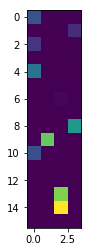

In [34]:
plt.imshow(Q) 